<img src="./images/365_logo.png" />

# The 365 Learning Data Challenge

## Introduction

## Project Description

<p><a href="https://365datascience.com/" target='_blank'>365 Data science </a>is an online learning platform specializing in data science courses. Students learn by watching video content, then evaluate their knowledge by taking quizzes, practice exams, course exams, and career track exams. The exams can be attempted more than once.</p>

<p>As Data scientist at 365 , my  task is to develop a machine learning model to predict whether a Free Plan user would convert to a paid subscriber or not.</p>

## Ressources

<p> You can access the resources through this link : <a href="https://www.dropbox.com/s/7g5zgocllutcb1x/365_learning_challenge.zip?dl=0" target="_blank"> Here </a> MySQL database of 11 tables and  collection of 11 .csv files.
</p>
<ul>
    <li>365_course_info.csv</li>
    <li>365_course_rating.csv</li>
    <li>365_exam_info.csv</li>
    <li>365_quiz_info.csv</li>
    <li>365_student_engagement.csv</li>
    <li>365_student_exams.csv</li>
    <li>365_student_hub_questions.csv</li>
    <li>365_student_info.csv</li>
    <li>365_student_learning.csv</li>
    <li>365_student_purchases.csv</li>
    <li>365_student_quizzes.csv</li>
<ul>

## Evaluation

<p>In this model we want to predict if a student will be able to convert to a paying plan, so we will try to build a very preci model in this case, so we will focus on the metric <a>Precision</a> without forgetting the others, especially the <a>Recall<a> and the <a>f1 score</a>, then we will see the <a>Confusion matrix</a></p>

## Work process :

<ol>
    <li>Importing Libraries</li>
    <li>
        Dataset preparation and preprocessing
        <ul>
            <li>Data collection</li>
            <li>Data visualization</li>
            <li>Data selection</li>
            <li>Dataset splitting</li>
            <li>Data Cleaning</li>
            <li>Data formatting</li>
            <li>Data Scaling</li>
        </ul>
    </li>
    <li>Modeling and Validation</li>
    <li>Evaluating the model using  test set</li>
</ol>

## Importing Libraries

In [431]:
# Libraries

# EDA 
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# -Pre-Processing 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# -Model Selection
from sklearn.model_selection import train_test_split


# -Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.svm import SVC

# Model validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve 

#Hyper-parameter Hyper-parameter
from sklearn.model_selection import GridSearchCV

# Deal with unbalanced data
from imblearn.under_sampling import RandomUnderSampler

# -Metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import  roc_auc_score, roc_curve, auc

%matplotlib inline

In [373]:

#Import of very relevant data 

course_ratings = pd.read_csv('365_database/365_course_ratings.csv')

student_info = pd.read_csv('365_database/365_student_info.csv')

student_learning = pd.read_csv('365_database/365_student_learning.csv')

student_purchases = pd.read_csv('365_database/365_student_purchases.csv')

# Less relevant data

#course_info = pd.read_csv('365_database/365_course_info.csv')

#exam_info = pd.read_csv('365_database/365_exam_info.csv')

#quiz_info = pd.read_csv('365_database/365_quiz_info.csv')

#student_engagement = pd.read_csv('365_database/365_student_engagement.csv')

#student_exams = pd.read_csv('365_database/365_student_exams.csv')

#student_hub_questions = pd.read_csv('365_database/365_student_hub_questions.csv')

#student_quizzes =pd.read_csv('365_database/365_student_quizzes.csv')


## Dataset preparation and preprocessing

### Data collection

In [374]:
course_ratings.head()

,course_id,student_id,course_rating,date_rated
0,14,258956,5,2022-07-06
1,7,259019,5,2022-08-30
2,23,259019,4,2022-08-30
3,14,259283,5,2022-07-08
4,30,259283,5,2022-07-02


In [375]:
student_info.head()

,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01
3,258801,IN,2022-01-01
4,258802,US,2022-01-01


In [376]:
student_learning.head()

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07


In [377]:
student_purchases.head()

,purchase_id,student_id,purchase_type,date_purchased
0,15781,258800,Annual,2022-01-01
1,15786,258803,Annual,2022-01-01
2,15808,258862,Annual,2022-01-01
3,15809,258865,Annual,2022-01-01
4,15811,258878,Annual,2022-01-01


In [378]:
# Merge differents data to build a data set 

In [379]:
df = pd.merge(student_learning, student_purchases, how='left', on='student_id').merge(student_info, how='left', on='student_id').merge(course_ratings, how='left', on=['student_id', 'course_id'])

In [380]:
df.head()

,student_id,course_id,minutes_watched,date_watched,purchase_id,purchase_type,date_purchased,student_country,date_registered,course_rating,date_rated
0,258798,23,0.3,2022-01-01,NaN,NaN,NaN,IN,2022-01-01,NaN,NaN
1,258800,2,12.9,2022-04-01,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
2,258800,7,46.8,2022-01-03,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
3,258800,7,4.3,2022-01-04,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN
4,258800,7,31.7,2022-01-07,15781.0,Annual,2022-01-01,CA,2022-01-01,NaN,NaN


In [381]:
df['purchase'] = df['purchase_type']

df.drop('purchase_type', axis=1, inplace=True)

dic = {'Annual':1, 'Monthly':1, 'Quarterly': 1, np.nan: 0}

df['purchase'] = df['purchase'].map(dic)

df['purchase'] = df['purchase'].astype('int')

In [382]:
df.head(10)

,student_id,course_id,minutes_watched,date_watched,purchase_id,date_purchased,student_country,date_registered,course_rating,date_rated,purchase
0,258798,23,0.3,2022-01-01,NaN,NaN,IN,2022-01-01,NaN,NaN,0
1,258800,2,12.9,2022-04-01,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
2,258800,7,46.8,2022-01-03,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
3,258800,7,4.3,2022-01-04,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
4,258800,7,31.7,2022-01-07,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
5,258800,7,61.6,2022-01-05,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
6,258800,7,45.1,2022-01-06,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
7,258800,11,0.5,2022-02-21,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
8,258800,11,1.1,2022-02-22,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1
9,258800,14,4.0,2022-01-28,15781.0,2022-01-01,CA,2022-01-01,NaN,NaN,1


In [383]:
df.shape

(87633, 11)

In [384]:
# the dataset has 87633 sample, not bad 😋 and 12 columns

In [385]:
df.isnull().sum()

student_id             0
course_id              0
minutes_watched        0
date_watched           0
purchase_id        27204
date_purchased     27204
student_country       44
date_registered        0
course_rating      71054
date_rated         71054
purchase               0
dtype: int64

In [386]:
# A lot of missing values, this is normal due to the merge 😐

In [387]:
df.dtypes

student_id           int64
course_id            int64
minutes_watched    float64
date_watched        object
purchase_id        float64
date_purchased      object
student_country     object
date_registered     object
course_rating      float64
date_rated          object
purchase             int32
dtype: object

##### Remarks

<p>Most of the data are object type, so we have a lot of transformation work to do</p>

In [388]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,87633.0,272453.644597,9934.821750,258798.0,263690.0,270486.0,280019.0,295513.0
course_id,87633.0,19.587941,12.274264,2.0,7.0,16.0,24.0,67.0
minutes_watched,87633.0,31.387779,41.174484,0.0,5.4,18.9,42.2,1710.6
purchase_id,60429.0,19469.821112,2054.504091,15781.0,17677.0,19504.0,21243.0,23152.0
course_rating,16579.0,4.795766,0.520219,1.0,5.0,5.0,5.0,5.0
purchase,87633.0,0.689569,0.462673,0.0,0.0,1.0,1.0,1.0


##### Remarks

* 50% of students watched videos of more than 10 min
* Most of the students give, This is normal, since the quality of teaching is excellent

### Data Visualisation

In [389]:
counts = df['student_country'].value_counts()

df = df.loc[df['student_country'].isin(counts.index[counts > 10])]

### Data selection

In [390]:
# Drop unuseful columns
data = df.copy()
data = df.drop(['purchase_id', 'student_id', 'date_purchased'], axis=1)

In [391]:
data.head()

,course_id,minutes_watched,date_watched,student_country,date_registered,course_rating,date_rated,purchase
0,23,0.3,2022-01-01,IN,2022-01-01,NaN,NaN,0
1,2,12.9,2022-04-01,CA,2022-01-01,NaN,NaN,1
2,7,46.8,2022-01-03,CA,2022-01-01,NaN,NaN,1
3,7,4.3,2022-01-04,CA,2022-01-01,NaN,NaN,1
4,7,31.7,2022-01-07,CA,2022-01-01,NaN,NaN,1


In [392]:
# Check if there is any missing values
data.isna().sum()

course_id              0
minutes_watched        0
date_watched           0
student_country        0
date_registered        0
course_rating      70870
date_rated         70870
purchase               0
dtype: int64

### Data split

In [393]:
# Separate the target from the features
X = data.drop('purchase', axis=1)
y = data['purchase']

In [ ]:
# Check the X and y shapes
print("X shape: ", X.shape)
print("y shape: ", y.shape)

#### Ckeck if the data is balanced

<AxesSubplot:>

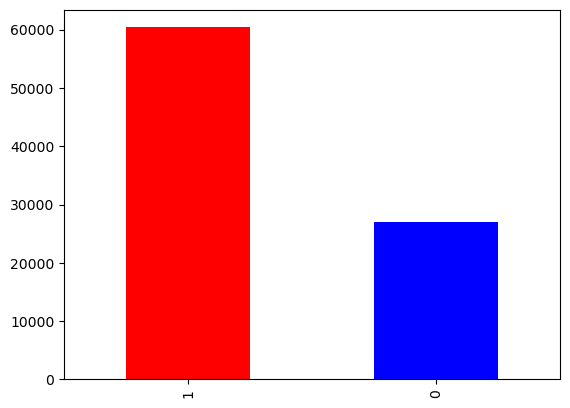

In [394]:
y.value_counts().plot(kind='bar', color=['red', 'blue'])

<p>Our Target is imbalanced, so we have to find you a strategy otherwise there will be risk of overfitting. So to solve this problem there are several techniques but I'm going to use the one of under sample, which will reduce the number of true values than false ones, it's not the best approach but it will allow me to train my models faster because of the reduced amount of data</p>

In [395]:
rsu = RandomUnderSampler()

X_res, y_res = rsu.fit_resample(X, y)

<AxesSubplot:>

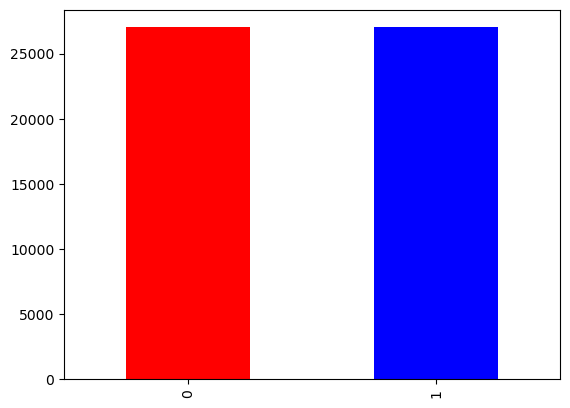

In [396]:
y_res.value_counts().plot(kind='bar', color=['red', 'blue'])

In [ ]:
# Check the X and y shapes
print("X shape: ", X.shape)
print("y shape: ", y.shape)

<p>Great Ouw Target is now correct Balanced</p>

In [397]:
# Split the data into train and test, put 20% of the data in the test set
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=365, stratify=y_res)

In [398]:
# Check if the split is correct , and the target is represented in the same proportion in the train and test set
print(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.5
1    0.5
Name: purchase, dtype: float64 0    0.5
1    0.5
Name: purchase, dtype: float64


In [ ]:
# Check the train and test shapes
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

### Cleaning

. Inpute Missing Values
- Inpute student_country by most frequent
- Inputer date_rated by most il same in date_registered
- Inpute course_rating by most freqent 

In [399]:
# Rename the columns
x_train['date_rated'].fillna(x_train['date_registered'], inplace=True)

x_test['date_rated'].fillna(x_train['date_registered'], inplace=True)

# Define the imputer
inputer = SimpleImputer(strategy='most_frequent')
# Fit the imputer
fit = inputer.fit_transform(x_train)
# Recreate the dataframe
x_train = pd.DataFrame(data = fit, columns=inputer.feature_names_in_)
x_test  = pd.DataFrame(data = inputer.transform(x_test), columns=inputer.feature_names_in_)


In [400]:
# Print the x_train
x_train.head()

,course_id,minutes_watched,date_watched,student_country,date_registered,course_rating,date_rated
0,23,23.3,2022-03-20,NG,2022-03-19,5.0,2022-03-19
1,42,0.6,2022-04-29,IN,2022-04-29,5.0,2022-04-29
2,14,16.0,2022-03-20,IN,2022-03-20,5.0,2022-03-20
3,34,137.3,2022-07-23,IN,2022-05-04,5.0,2022-07-23
4,35,29.1,2022-01-20,US,2022-01-10,5.0,2022-01-10


In [401]:
# We check if we haven't forgotten something
print("Missing values in train data : \n" , x_train.isnull().sum())
print("Missing values in test data : \n", x_train.isnull().sum())

Missing values in train data : 
 course_id          0
minutes_watched    0
date_watched       0
student_country    0
date_registered    0
course_rating      0
date_rated         0
dtype: int64
Missing values in test data : 
 course_id          0
minutes_watched    0
date_watched       0
student_country    0
date_registered    0
course_rating      0
date_rated         0
dtype: int64


In [403]:
#Converte date_registered, date_watched,date_purchased to date time
cols = ['date_registered', 'date_watched', 'date_rated']
for i in cols:
    x_train[i] = pd.to_datetime(x_train[i])
    x_test[i] = pd.to_datetime(x_test[i])

In [404]:
x_train.isna().sum()

course_id          0
minutes_watched    0
date_watched       0
student_country    0
date_registered    0
course_rating      0
date_rated         0
dtype: int64

<p>Great, we have finished cleaning the data, we will now try to extract data from our dataset before building our final model</p>

### Feature Engineering 

<p> I will create a column that will group the time between the date of recording and the date of viewing the course, 
technically  (date_registered - date_watched) </p>

In [405]:
# Create a new column with the difference between the date of watch and the date of registration to the course
x_train['period'] = x_train['date_watched'] - x_train['date_registered']
x_test['period'] = x_test['date_watched'] - x_test['date_registered']

# Create a new column with the difference between the date of rate  and the date of watch
x_train['period_bf_rating'] = x_train['date_rated'] - x_train['date_watched']
x_test['period_bf_rating']  = x_test['date_rated'] - x_test['date_watched']


In [406]:
x_train.head()

,course_id,minutes_watched,date_watched,student_country,date_registered,course_rating,date_rated,period,period_bf_rating
0,23,23.3,2022-03-20,NG,2022-03-19,5.0,2022-03-19,1 days,-1 days
1,42,0.6,2022-04-29,IN,2022-04-29,5.0,2022-04-29,0 days,0 days
2,14,16.0,2022-03-20,IN,2022-03-20,5.0,2022-03-20,0 days,0 days
3,34,137.3,2022-07-23,IN,2022-05-04,5.0,2022-07-23,80 days,0 days
4,35,29.1,2022-01-20,US,2022-01-10,5.0,2022-01-10,10 days,-10 days


In [407]:
x_train.isnull().sum()

course_id           0
minutes_watched     0
date_watched        0
student_country     0
date_registered     0
course_rating       0
date_rated          0
period              0
period_bf_rating    0
dtype: int64

### Encodage

In [408]:
#define the encoder
encoder  = OrdinalEncoder()

label = ['student_country']

x_train[label] = encoder.fit_transform(x_train[label])

x_test[label] = encoder.transform(x_test[label])


In [409]:
# drop date columns
x_train.drop(columns=['date_registered', 'date_rated', 'date_watched'], inplace=True)
x_test.drop(columns=['date_registered', 'date_rated', 'date_watched'], inplace=True)

# format data in proper format
x_train = x_train.astype({'course_id': 'int64','minutes_watched': 'int64', 'course_rating': 'int64', 'period': 'str', 'period_bf_rating': 'str', 'student_country': 'int64'})
x_test  = x_test.astype({'course_id': 'int64','minutes_watched': 'int64', 'course_rating': 'int64', 'period': 'str', 'period_bf_rating': 'str', 'student_country': 'int64'})

# convert period (x dates ) to numeric day in int format
x_train['period'] = np.abs((x_train['period'].apply(lambda x : x.split(' ')[0])).astype('int64'))
x_test['period'] = np.abs((x_test['period'].apply(lambda x : x.split(' ')[0])).astype('int64'))

#
x_train['period_bf_rating'] = np.abs((x_train['period_bf_rating'].apply(lambda x : x.split(' ')[0])).astype('int64'))
x_test['period_bf_rating'] = np.abs((x_test['period_bf_rating'].apply(lambda x : x.split(' ')[0])).astype('int64'))

In [410]:
x_train.head()

,course_id,minutes_watched,student_country,course_rating,period,period_bf_rating
0,23,23,81,5,1,1
1,42,0,54,5,0,0
2,14,16,54,5,0,0
3,34,137,54,5,80,0
4,35,29,116,5,10,10


In [411]:
x_train.dtypes

course_id           int64
minutes_watched     int64
student_country     int64
course_rating       int64
period              int64
period_bf_rating    int64
dtype: object

In [412]:
x_test.head()

,course_id,minutes_watched,student_country,course_rating,period,period_bf_rating
0,7,26,81,5,0,149
1,21,45,50,5,19,106
2,29,1,30,5,179,9
3,21,67,59,5,18,9
4,21,19,91,5,19,111


In [413]:
x_test.dtypes

course_id           int64
minutes_watched     int64
student_country     int64
course_rating       int64
period              int64
period_bf_rating    int64
dtype: object

<p>Now it's time to scale the data</p>

### Feature Scaling

In [414]:
# define scaler
scaler = MinMaxScaler()

# scale data
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

# recreate data frame
x_train_scale = pd.DataFrame(x_train_scale, columns=scaler.feature_names_in_)
x_test_scale = pd.DataFrame(x_test_scale, columns=scaler.feature_names_in_)


In [415]:
# check transformation
x_train_scale.head()

,course_id,minutes_watched,student_country,course_rating,period,period_bf_rating
0,0.323077,0.013450,0.653226,1.0,0.003448,0.003521
1,0.615385,0.000000,0.435484,1.0,0.000000,0.000000
2,0.184615,0.009357,0.435484,1.0,0.000000,0.000000
3,0.492308,0.080117,0.435484,1.0,0.275862,0.000000
4,0.507692,0.016959,0.935484,1.0,0.034483,0.035211


In [416]:
# check test data
x_test_scale.head()

,course_id,minutes_watched,student_country,course_rating,period,period_bf_rating
0,0.076923,0.015205,0.653226,1.0,0.000000,0.524648
1,0.292308,0.026316,0.403226,1.0,0.065517,0.373239
2,0.415385,0.000585,0.241935,1.0,0.617241,0.031690
3,0.292308,0.039181,0.475806,1.0,0.062069,0.031690
4,0.292308,0.011111,0.733871,1.0,0.065517,0.390845


## Model Building

<p>Now I will build a first model, then build several others and choose the best one and try to optimize it by setting its hyper parameters  </p>

### First Modeling

In [417]:
# define model
knn  = KNeighborsClassifier(n_neighbors=4)

# fit model
knn.fit(x_train_scale, y_train)

KNeighborsClassifier(n_neighbors=4)

In [418]:
# predict on test data
y_predict = knn.predict(x_test_scale)

In [419]:
# check accuracy
accuracy_score(y_test, y_predict)

0.65263644773358

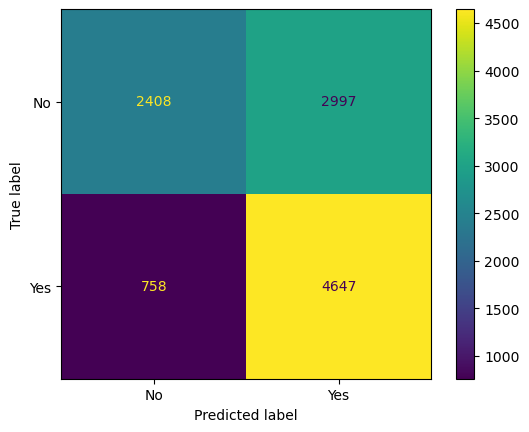

In [420]:
# Good accuracy, but we need to check the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_predict), display_labels=['No', 'Yes']).plot()

In [ ]:
# We can see that the model is not good at predicting the positive class, we need to improve it
# We must improve recall and precision as much as possible

In [422]:
# Check the classification report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.45      0.56      5405
           1       0.61      0.86      0.71      5405

    accuracy                           0.65     10810
   macro avg       0.68      0.65      0.64     10810
weighted avg       0.68      0.65      0.64     10810



In [423]:
# We can use turn hyperparameters to improve the model

### Hyper-parameter tuning

#### Grid search 

In [424]:
## Grid search to find the best parameters
grid_params = { 'n_neighbors': np.arange(1, 10), 
                'weights': ['uniform', 'distance'],
                'p': np.arange(1, 3) }

grid = GridSearchCV(knn, grid_params,scoring='accuracy')

In [425]:
grid.fit(x_train_scale, y_train)

KeyboardInterrupt: 

In [ ]:
print("The best parameters are ", grid.best_params_)
print("The best score is ", grid.best_score_)
best_est = grid.best_estimator_

The best parameters are  {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
The best score is  0.8644944474975788


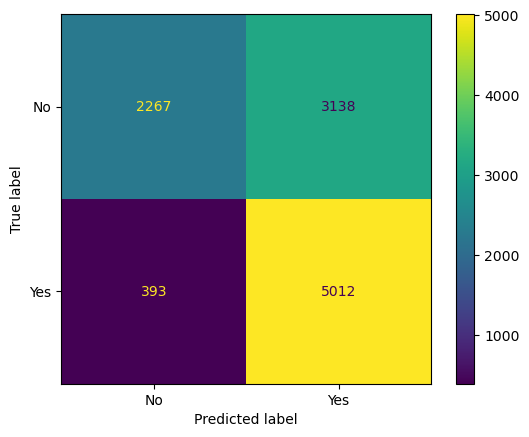

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, best_est.predict(x_test_scale), display_labels=['No', 'Yes'])

In [ ]:
# We can also check the classification report
print(classification_report(y_test, best_est.predict(x_test_scale)))

              precision    recall  f1-score   support

           0       0.85      0.42      0.56      5405
           1       0.61      0.93      0.74      5405

    accuracy                           0.67     10810
   macro avg       0.73      0.67      0.65     10810
weighted avg       0.73      0.67      0.65     10810



<p style="color:red">we can try to improve it by using other models</p>

### Train multiple Models

In [430]:
MultipleModels = {'LogisticRegression': LogisticRegression(),
                  'DecisionTreeClassifier': DecisionTreeClassifier(),
                  'RandomForestClassifier': RandomForestClassifier(),
                  'GaussianNB': GaussianNB(),
                  'svm': SVC()}

In [432]:
scores = []
for name, model in MultipleModels.items():
    model.fit(x_train_scale, y_train)
    y_pred = model.predict(x_test_scale)
    scores.append({
        'name': name,
        'accuracy': accuracy_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    })


In [437]:
df_scores = print(pd.DataFrame(scores))
   

                     name  accuracy    recall  precision        f1
0      LogisticRegression  0.779186  0.813136   0.761435  0.786436
1  DecisionTreeClassifier  0.662720  0.839223   0.620265  0.713320
2  RandomForestClassifier  0.719519  0.948751   0.650514  0.771824
3              GaussianNB  0.650694  0.735800   0.628775  0.678090
4                     svm  0.638945  0.937650   0.586982  0.721989


<p>We can see that the best model is the LogisticRegression, we are going to improve it</p>

In [438]:
# We can see that the best model is the RandomForestClassifier
# We can try to improve it by using the best parameters
params_forest = {'max_depth':[3,5,10,None],
                'n_estimators':[10,100,200],
                'max_features':[1,3,5,7],
                'min_samples_leaf':[1,2,3],
                'min_samples_split':[1,2,3]
           }
grid_forest = GridSearchCV(RandomForestClassifier(), params_forest, scoring='accuracy')

In [439]:
grid_forest.fit(x_train_scale, y_train)

In [ ]:
grid_forest.b